# 📊 Análise Exploratória dos Dados do SUS  
**Objetivo:** Higienização e compreensão dos dados, com foco na variável-alvo `CIRCOBITO = 2`.

---

# 🧪 Metodologia

1. **Conexão com a Base de Dados**
   - Utilizar a biblioteca `pysus` para acessar os dados públicos do SUS.

2. **Análise Exploratória dos Dados (EDA)**
   - Mapear as relações entre **todas as colunas** da base.
   - Identificar padrões, inconsistências e possíveis outliers.

3. **Coeficientes de Correlação**
   - Calcular o grau de relação de **todas as variáveis** com a variável-alvo `CIRCOBITO = 2`.
   - Gerar documento para facilitar a tomada de decisão na modelagem preditiva.

4. **Divulgação**
   - Preparar visualizações e insights obtidos na análise para **divulgação no LinkedIn** do projeto.

---


## 📥 Instalação do ecossistema necessário

In [1]:
!pip install pysus

## 📖 Importando bibliotecas necessárias:

In [2]:
import pandas as pd
import numpy as np
from pysus import SIM
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
from scipy.interpolate import make_interp_spline

## ⛏️ **ETAPA 1:**  Mineração dos dados

In [3]:
## ⛏️Mineração dos dados

In [4]:
# Carrega o módulo SIM
sim = SIM().load()

# Obtém os arquivos de 2023 para o estado de SP e grupo CID10
arquivos_2023 = sim.get_files("CID10", year=2023)

# Faz o download do arquivo (ou dos arquivos, se houver mais de um)
parquets = [arquivo.download() for arquivo in arquivos_2023]

dfs = [pq.to_dataframe() for pq in parquets]

# Junta todos os dataframes, caso haja mais de um
df = pd.concat(dfs, ignore_index=True)

# Exibe as 5 primeiras linhas
print(df.head(5))


  ORIGEM TIPOBITO   DTOBITO HORAOBITO NATURAL CODMUNNATU    DTNASC IDADE  \
0      1        2  01012023     0610      812    120070   26011941   481   
1      1        2  01012023     1305      813    130180   20081966   456   
2      1        2  01012023     0020      812    120030   15061968   454   
3      1        2  01012023     1430      812    120045   14111965   457   
4      1        2  01012023     1040      812    120035   12021958   464   

   SEXO RACACOR  ... FONTES TPRESGINFO TPNIVELINV NUDIASINF DTCADINF  \
0     1       4  ...                                                   
1     2       4  ...                                                   
2     2       1  ...                                                   
3     1       4  ...                                                   
4     2       4  ...                                                   

   MORTEPARTO DTCONCASO FONTESINF ALTCAUSA  CONTADOR  
0                                           2067      


In [5]:
df.columns

Index(['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV

* ✅ Dados minerados com sucesso

## 🔍 **ETAPA 2:** Análise exploratória dos dados
- Uma vez que sabemos que o target está na coluna `CIRCOBITO`, vamos analisar, uma a uma, as demais colunas para identificar quais são preditores do tipo de óbito. Ao mesmo tempo, iremos gerar gráficos analíticos para apresentar as informações posteriormente.

In [6]:
df.columns

Index(['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV

In [7]:
df.drop(columns=['ORIGEM'], inplace=True)

In [8]:
df.drop(columns=['TIPOBITO'], inplace=True)

In [9]:
df.drop(columns=['DTOBITO'], inplace=True)

In [10]:
# Função para classificar cada valor em 'HORAOBITO'
def classify_value(x):
    # Verifica NaN ou None
    if pd.isna(x):
        return 'blank'
    # Verifica strings
    if isinstance(x, str):
        if x.strip() == '':
            return 'blank'
        else:
            return 'string'
    # Verifica valores numéricos
    if isinstance(x, (int, float, np.integer, np.floating)):
        return 'numeric'
    # Outros tipos (caso existam)
    return 'other'

# Aplica a classificação e conta cada categoria
counts = df['HORAOBITO'].apply(classify_value).value_counts()

print("Contagem por categoria em 'HORAOBITO':")
print(counts)

# Opcional: separar NaN de strings vazias
def classify_detailed(x):
    if pd.isna(x):
        return 'NaN'
    if isinstance(x, str):
        if x.strip() == '':
            return 'empty_string'
        else:
            # Tentar converter para número?
            try:
                float(x)
                return 'string_numeric'  # string que representa número
            except:
                return 'string_non_numeric'
    if isinstance(x, (int, float, np.integer, np.floating)):
        return 'numeric'
    return 'other'

detailed_counts = df['HORAOBITO'].apply(classify_detailed).value_counts()
print("\nContagem detalhada em 'HORAOBITO':")
print(detailed_counts)

Contagem por categoria em 'HORAOBITO':
HORAOBITO
string    2819930
blank       98209
Name: count, dtype: int64

Contagem detalhada em 'HORAOBITO':
HORAOBITO
string_numeric    2819930
empty_string        98209
Name: count, dtype: int64


In [11]:
# Remover linhas onde 'HORAOBITO' é NaN ou string em branco:

# 1. Remover NaN:
df = df.dropna(subset=['HORAOBITO'])

# 2. Remover strings vazias ou só com espaços (caso existam):
#    Converte em string, retira espaços e filtra diferente de ''
df = df[df['HORAOBITO'].astype(str).str.strip() != '']

# Opcional: resetar o índice após remoção
df = df.reset_index(drop=True)


In [12]:
df = df[df['CIRCOBITO'] == '2'].copy()

In [13]:
df.head(3)


,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
22,1100,813,130260,25101981,441,1,4,9,2,1,...,,,,,,,,,,7886
37,1920,812,120020,27082003,419,1,4,1,3,1,...,,,,,,,,,,13647
135,1200,812,120040,25101980,442,1,4,1,3,2,...,,,,,,,,,,53256


In [14]:
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)
df['HORA'] = df['HORAOBITO'].str[:2].astype(int)

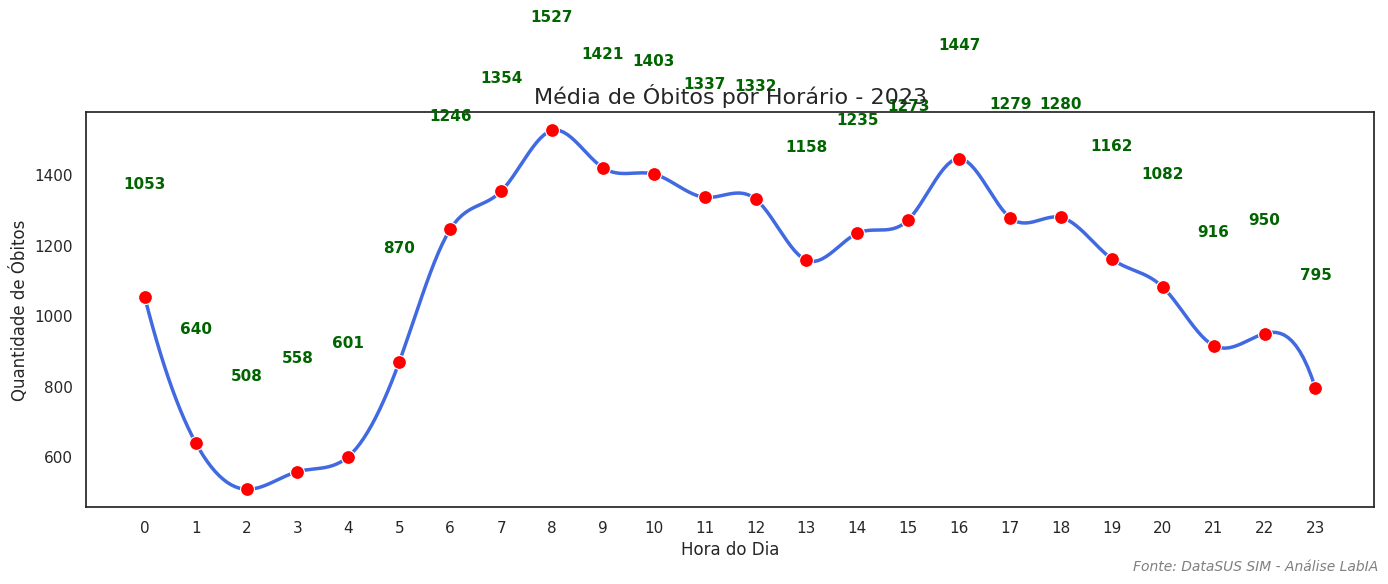

In [15]:
# 1. Garante 4 dígitos
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)

# 2. Extrai hora
df['HORA'] = df['HORAOBITO'].str[:2].astype(int)

# 3. Agrupa por hora
contagem_por_hora = df.groupby('HORA').size().reset_index(name='QTD_OBITOS')

# Verifica se tem dados suficientes
if len(contagem_por_hora) < 4:
    raise ValueError("Poucos dados por hora para suavização. Mínimo necessário: 4 horas distintas.")

# 4. Cópia para as médias individuais
media_por_hora = df.groupby('HORA').size().reset_index(name='MEDIA_OBITOS')

# 5. Merge
dados = pd.merge(contagem_por_hora, media_por_hora, on='HORA')

# 6. Estilo
sns.set_theme(style='white')

plt.figure(figsize=(14, 6))

# 7. Suavização com segurança
x = dados['HORA'].to_numpy()
y = dados['QTD_OBITOS'].to_numpy()

try:
    xnew = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(xnew)
    plt.plot(xnew, y_smooth, color='royalblue', linewidth=2.5)
except ValueError:
    # fallback sem suavizar
    plt.plot(x, y, color='royalblue', linewidth=2.5)

# 8. Pontos
sns.scatterplot(data=dados, x='HORA', y='QTD_OBITOS', color='red', s=100, zorder=10)

# 9. Rótulo sem decimal
for i, row in dados.iterrows():
    plt.text(row['HORA'], row['QTD_OBITOS'] + 300,
             f"{int(row['MEDIA_OBITOS'])}", ha='center', va='bottom',
             fontsize=11, color='darkgreen', fontweight='bold')

# 10. Eixos e título
plt.title('Média de Óbitos por Horário - 2023', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Óbitos', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(False)

# 11. Fonte
plt.figtext(0.99, 0.01, 'Fonte: DataSUS SIM - Análise LabIA',
            horizontalalignment='right', fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.show()

In [16]:
df['HORAOBITO']


,HORAOBITO
22,1100
37,1920
135,1200
164,0830
187,0100
...,...
2819730,0140
2819734,0900
2819761,2100
2819781,1410


In [17]:
# Prepara coluna HORAOBITO como string com 4 dígitos
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)

# Filtra apenas valores válidos (4 dígitos numéricos)
df_validos = df[df['HORAOBITO'].str.fullmatch(r'\d{4}') == True].copy()

# Extrai HORA
df_validos['HORA'] = df_validos['HORAOBITO'].str[:2].astype(int)

# 1. Contagem de registros por hora
print("📊 Contagem de óbitos por hora:")
print(df_validos['HORA'].value_counts().sort_index())

# 2. Valores únicos de HORAOBITO que geraram HORA == 0
print("\n🔍 Valores brutos de HORAOBITO que viraram HORA == 0:")
print(df_validos[df_validos['HORA'] == 0]['HORAOBITO'].value_counts().head(20))

# 3. Valores inválidos descartados no processo
df_invalidos = df[~df['HORAOBITO'].str.fullmatch(r'\d{4}')]
print("\n⚠️ Valores de HORAOBITO inválidos que foram descartados:")
print(df_invalidos['HORAOBITO'].value_counts().head(10))

📊 Contagem de óbitos por hora:
Series([], Name: count, dtype: int64)

🔍 Valores brutos de HORAOBITO que viraram HORA == 0:
Series([], Name: count, dtype: int64)

⚠️ Valores de HORAOBITO inválidos que foram descartados:
HORAOBITO
0800     646
1000     573
0600     533
1200     520
1600     519
0900     514
0700     477
1100     471
1400     453
1700     453
Name: count, dtype: int64


# Parece que o 0000 é um outlier, um valor proforma "placeholder" que é utilizado apenas para não deixar o dado em branco, perdendo assim a confiabilidade, devido a isto vamos retirar a 0 hora do nosso gráfico

/tmp/ipython-input-30-1193603391.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['11' '19' '12' ... '21' '14' '00']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, 'HORA'] = df_filtered['HORAOBITO'].astype(str).str.zfill(4).str[:2]
/tmp/ipython-input-30-1193603391.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='HORA', y='PORCENTAGEM', data=combined_data, palette=palette)


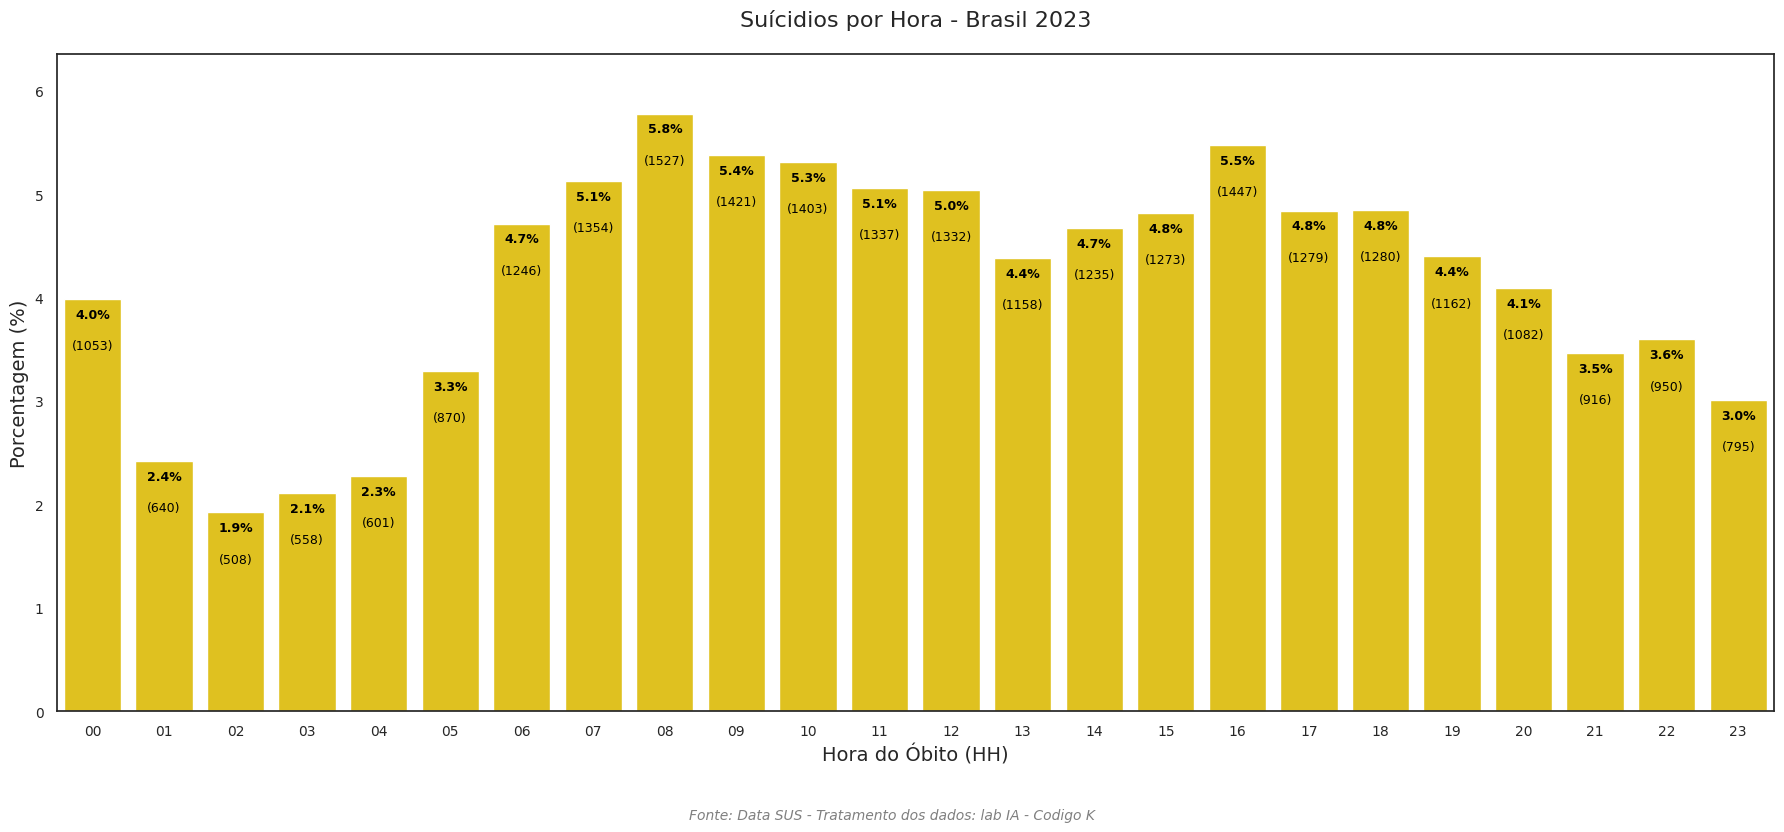

In [30]:
# Filtra removendo '0000' e cria uma cópia explícita
df_filtered = df[df['HORAOBITO'] != 0].copy()

# Extrai hora
df_filtered.loc[:, 'HORA'] = df_filtered['HORAOBITO'].astype(str).str.zfill(4).str[:2]

# Conta e calcula porcentagem
counts = df_filtered['HORA'].value_counts().sort_index()
percentages = (counts / counts.sum()) * 100

# Criar um DataFrame combinado
combined_data = pd.DataFrame({
    'PORCENTAGEM': percentages,
    'CONTADOR': counts
}).reset_index()
combined_data.columns = ['HORA', 'PORCENTAGEM', 'CONTADOR']

plt.figure(figsize=(18, 9))

yellow_color = '#FFD700'
palette = [yellow_color] * len(combined_data)

ax = sns.barplot(x='HORA', y='PORCENTAGEM', data=combined_data, palette=palette)

ax.set_title('Suícidios por Hora - Brasil 2023', fontsize=16, pad=20)
ax.set_xlabel('Hora do Óbito (HH)', fontsize=14)
ax.set_ylabel('Porcentagem (%)', fontsize=14)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

for index, p in enumerate(ax.patches):
    height = p.get_height()
    count_value = combined_data.loc[index, 'CONTADOR']

    y_position_percent = height - (ax.get_ylim()[1] * 0.03)
    y_position_count = height - (ax.get_ylim()[1] * 0.08)

    ax.text(p.get_x() + p.get_width()/2.,
            y_position_percent,
            f'{height:.1f}%',
            ha='center', fontsize=9, color='black', fontweight='bold')

    ax.text(p.get_x() + p.get_width()/2.,
            y_position_count,
            f'({int(count_value)})',
            ha='center', fontsize=9, color='black')

max_percentage = combined_data['PORCENTAGEM'].max()
ax.set_ylim(0, max_percentage * 1.10)

# --- Mudança Principal AQUI ---
# Aumentar ainda mais o 'bottom' no rect para garantir espaço para a fonte
plt.tight_layout(rect=[0, 0.07, 1, 0.95]) # Ajustei o 'bottom' de 0.05 para 0.07

# Coloca a fonte "Data SUS" abaixo do gráfico
# O 'y' (0.03) agora estará dentro do espaço garantido pelo tight_layout
plt.figtext(0.5, 0.03, 'Fonte: Data SUS - Tratamento dos dados: lab IA - Codigo K', ha='center', fontsize=10, style='italic', color='gray')

plt.show()